# Step 1: Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Selecting Stocks to Analyze

Used this to get names for largest Indian Companies by market cap - https://companiesmarketcap.com/inr/india/largest-companies-in-india-by-market-cap/

In [2]:
tickers = [
    "RELIANCE.NS",
    "HDB",
    "TCS.NS",
    "BHARTIARTL.NS",
    "IBN",
    "INFY",
    "LICI.NS",
    "BAJFINANCE.NS",
    "HINDUNILVR.NS"
]


# Step 3: Fetching Historical Price Data

In [3]:
raw_data = yf.download(tickers, '2020-01-01', '2025-06-09')

C:\Users\da\AppData\Local\Temp\ipykernel_7888\3162912813.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw_data = yf.download(tickers, '2020-01-01', '2025-06-09')
[*********************100%***********************]  9 of 9 completed


In [4]:
close_data = raw_data['Close'].dropna()

In [5]:
close_data.head()

Ticker,BAJFINANCE.NS,BHARTIARTL.NS,HDB,HINDUNILVR.NS,IBN,INFY,LICI.NS,RELIANCE.NS,TCS.NS
Date,,,,,,,,,
2022-05-17,5727.244141,696.819336,53.874756,2147.097900,18.055191,18.106400,856.956604,1163.254150,3210.440186
2022-05-18,5705.561035,686.077087,52.350750,2191.474121,17.468668,17.340042,858.033630,1167.485718,3207.835693
2022-05-19,5599.401855,664.493958,52.093449,2165.795166,17.410015,17.201542,823.275574,1140.579224,3034.040283
2022-05-20,5660.821289,677.946472,53.241402,2224.517334,17.693502,17.266172,808.882874,1207.086426,3062.920898
2022-05-23,5684.761230,675.926147,53.083065,2276.019287,18.035641,17.441605,799.777161,1199.014526,3089.661865


In [6]:
returns = close_data.pct_change().dropna()
returns.head()

Ticker,BAJFINANCE.NS,BHARTIARTL.NS,HDB,HINDUNILVR.NS,IBN,INFY,LICI.NS,RELIANCE.NS,TCS.NS
Date,,,,,,,,,
2022-05-18,-0.003786,-0.015416,-0.028288,0.020668,-0.032485,-0.042325,0.001257,0.003638,-0.000811
2022-05-19,-0.018606,-0.031459,-0.004915,-0.011718,-0.003358,-0.007987,-0.040509,-0.023047,-0.054178
2022-05-20,0.010969,0.020245,0.022036,0.027113,0.016283,0.003757,-0.017482,0.058310,0.009519
2022-05-23,0.004229,-0.002980,-0.002974,0.023152,0.019337,0.010160,-0.011257,-0.006687,0.008731
2022-05-24,0.000828,-0.011154,0.011372,-0.029477,-0.006504,-0.025940,0.007651,0.003433,-0.010160


# Step 5: Simulating 100,000 Random Portfolios (Monte Carlo Simulation)

In [7]:
total_portfolios = 100000
np.random.seed(609)

all_returns = []
all_risks = []
all_sharpes = []
all_weights = [] 

In [8]:
for i in range(total_portfolios):

    weights = np.random.rand(len(tickers))
    weights = weights/sum(weights)

    avg_daily_returns = returns.mean()
    yearly_return = np.dot(weights, avg_daily_returns) * 252
    all_returns.append(yearly_return)

    yearly_cov = returns.cov() * 252
    risk = np.sqrt(np.dot(weights.T, np.dot(yearly_cov, weights)))
    all_risks.append(risk)

    sharpe = yearly_return / risk
    all_sharpes.append(sharpe)

    all_weights.append(weights)

# Step 6: Visualization

In [9]:
all_returns = np.array(all_returns)
all_risks = np.array(all_risks)
all_sharpes = np.array(all_sharpes)
best_index = all_sharpes.argmax()

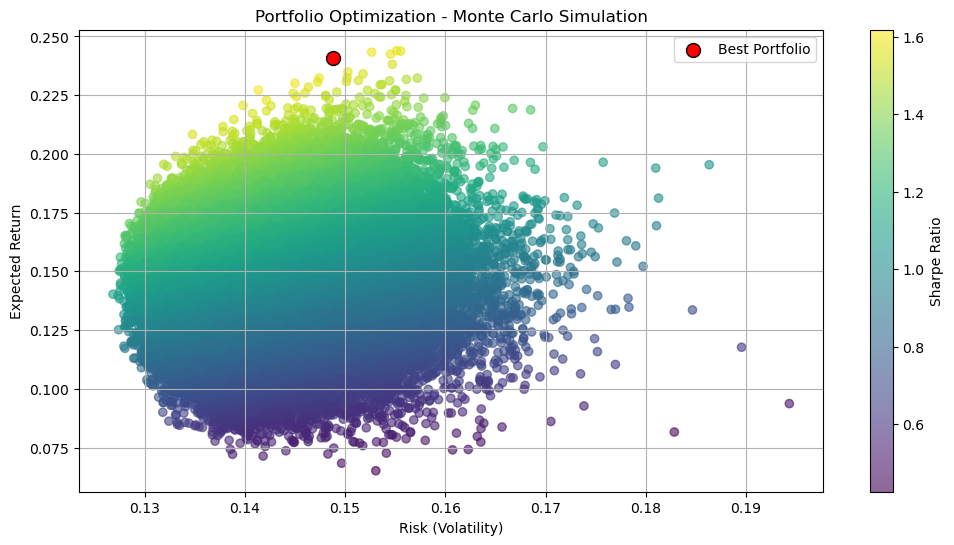

In [10]:
plt.figure(figsize=(12,6))
plt.scatter(all_risks, all_returns, c=all_sharpes, cmap='viridis', alpha=0.6)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(all_risks[best_index], all_returns[best_index], c='red', s=100, edgecolors='black', label='Best Portfolio')
plt.xlabel('Risk (Volatility)')
plt.ylabel('Expected Return')
plt.title('Portfolio Optimization - Monte Carlo Simulation')
plt.legend()
plt.grid(True)
plt.savefig('simulation.png')
plt.show()

# Step 7: Best Weights

In [11]:
best_weights = all_weights[best_index]

In [12]:
best_weights
for i in range(len(tickers)):
    print(f"{tickers[i]}: {best_weights[i]*100:.2f}%")

RELIANCE.NS: 11.65%
HDB: 40.05%
TCS.NS: 10.46%
BHARTIARTL.NS: 0.66%
IBN: 15.37%
INFY: 1.88%
LICI.NS: 2.65%
BAJFINANCE.NS: 8.22%
HINDUNILVR.NS: 9.06%


# Step 8: Backtesting

## Simulating an investment of ₹50,000 for one year using the optimized weights.

In [13]:
from datetime import datetime, timedelta

In [15]:
tickers

['RELIANCE.NS',
 'HDB',
 'TCS.NS',
 'BHARTIARTL.NS',
 'IBN',
 'INFY',
 'LICI.NS',
 'BAJFINANCE.NS',
 'HINDUNILVR.NS']

In [16]:
weights = np.array([
    0.1165, 0.4005, 0.1046, 0.0066, 0.1537,
    0.0188, 0.0265, 0.0822, 0.0906
])

In [17]:
data_1yr = yf.download(tickers, start='2024-01-01', end='2025-06-09')['Close'].dropna()

C:\Users\da\AppData\Local\Temp\ipykernel_7888\3862981993.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_1yr = yf.download(tickers, start='2024-01-01', end='2025-06-09')['Close'].dropna()
[*********************100%***********************]  9 of 9 completed


In [18]:
returns_1yr = data_1yr.pct_change().dropna()

In [20]:
portfolio_returns = returns_1yr.dot(weights)

initial_investment = 50000
portfolio_value = initial_investment * (1 + portfolio_returns).cumprod()

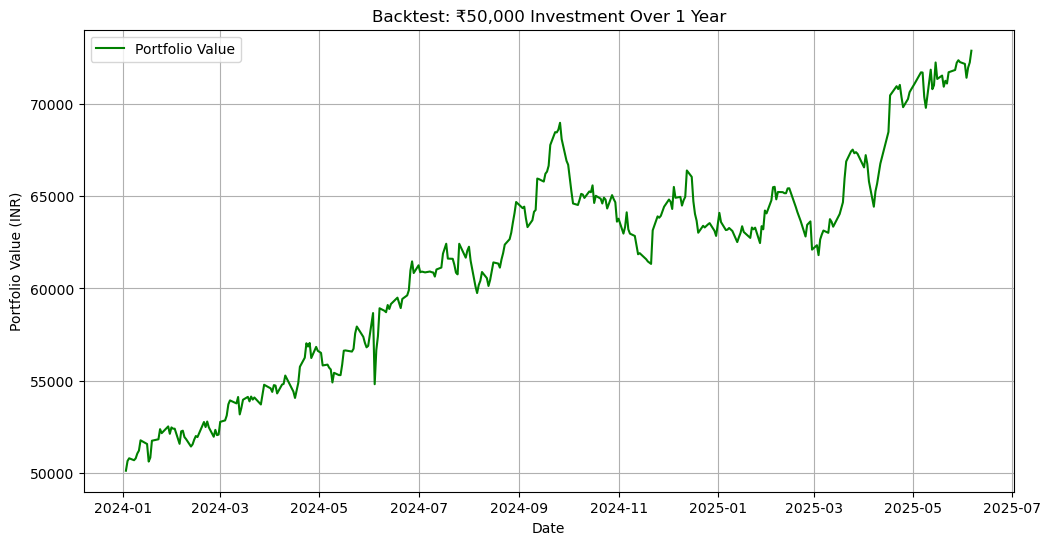

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value, label="Portfolio Value", color='green')
plt.title("Backtest: ₹50,000 Investment Over 1 Year")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (INR)")
plt.grid(True)
plt.legend()
plt.savefig('backtesting.png')
plt.show()

# Conclusion

In the project, I applied Monte Carlo Simulation to construct a portfolio of 9 Indian companies. After simulating 100,000 portfolios. I selected the highest Sharpe Ratio, balancing risk and return effectively.

I then backtested the portfolio by simulating a ₹50,000 investment over the past 1 year. The results showed:

    Final Value: ~₹72,000
    Approx. Return: ~44% in 1 year (Buy-and-Hold strategy)
    The portfolio showed moderate volatility and strong upside, validating the effectiveness of the optimized weights.